# Data science pipeline (pandas, seaborn, scikit-learn) illustrated with a simple linear regression problem



## Agenda

- How do I use the **pandas library** to read data into Python?
- How do I use the **seaborn library** to visualize data?
- What is **linear regression**, and how does it work?
- How do I **train and interpret** a linear regression model in scikit-learn?
- What are some **evaluation metrics** for regression problems?
- How do I choose **which features to include** in my model?

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

## Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

- Anaconda users: pandas is already installed
- Other users: [installation instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)

In [3]:
# conventional way to import pandas
import pandas as pd

In [4]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [5]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://seaborn.pydata.org/installing.html)

In [7]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\yanno\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


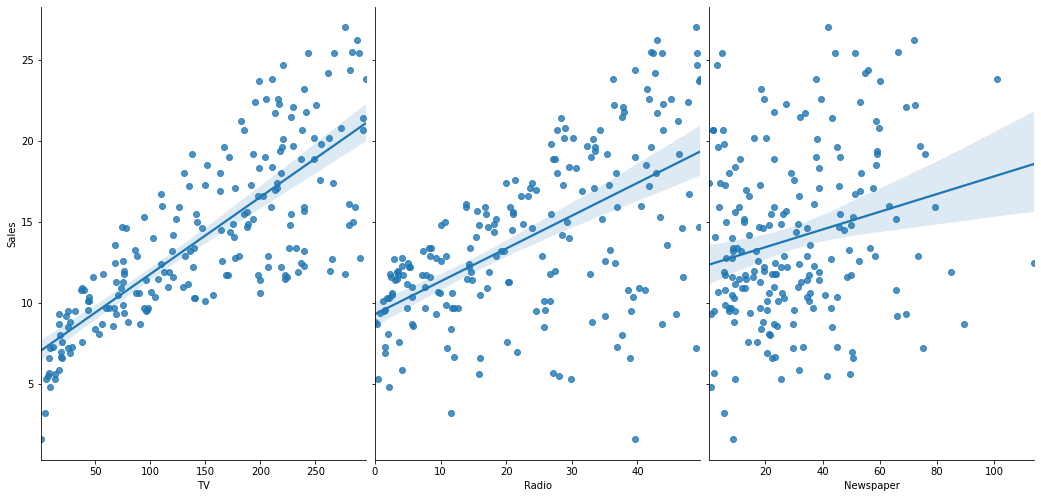

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [9]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [11]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [12]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [15]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting model coefficients

In [16]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [17]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150274),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180469)]

<span style="color:red">**QUESTION:** How do you interpret these results?</span>

Plus le coefficient associé à un feature est grand plus les variations en quantité de ce feature a de l'influence sur la valeur de la prédiction. Autrement dit, ici, il vaut mieux dépenser des dollars en publicité radio qu'en publicité TV, et il vaut mieux dépenser des dollars en publicité TV qu'en publicité dans un journal d'actualités.

### Making predictions

In [18]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [19]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [20]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [21]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

<span style="color:red">**QUESTION:** Code in the cell below the computation of RMSE using `numpy`?</span>

In [22]:
# PUT YOUR CODE
import numpy as np
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


## Feature selection


<span style="color:red">**QUESTION:** Can we increase the quality of our predictionc by just selecting 2 features? If yes, which ones do we have to select?</span>



In [28]:
# Put your code

X = data[['TV', 'Radio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

list(zip(feature_cols, linreg.coef_))

# make predictions on the testing set
y_pred = linreg.predict(X_test)

print('RMSE: ')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

###

X = data[['TV', 'Newspaper']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

list(zip(feature_cols, linreg.coef_))

# make predictions on the testing set
y_pred = linreg.predict(X_test)

print('RMSE: ')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

##

X = data[['Radio', 'Newspaper']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

list(zip(feature_cols, linreg.coef_))

# make predictions on the testing set
y_pred = linreg.predict(X_test)

print('RMSE: ')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 
1.3879034699382888
RMSE: 
3.352056334433862
RMSE: 
3.7486974974677265


<span style="color:red">**Put your comments** </span>

Il n'y a que pour la régression linéaire avec pour features 'TV' et 'Radio' parmi les régression linéaire à 2 features qui nous donne une RMSE strictement inférieure à la RMSE obtenue avec la régression linéaire à 3 features 'TV', 'Radio', et 'Newspaper'.
En effet 1.3879034699382888 < 1.404651423032895.
Alors que 3.352056334433862 > 1.404651423032895 et 3.7486974974677265 > 1.404651423032895.

On peut donc améliorer la qualité de nos prédictions en passant d'un modèle de régression linéaire à 3 features, à un modèle de régression linéaire à seulement 2 features, à conditions que ces features soient 'TV' et 'Radio' et aucune autre combinaise de 2 features à partir des 3 à notre disposition.

## Resources

Linear regression:

- [Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by me
- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by me
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:

- [pandas Q&A video series](https://www.dataschool.io/easier-data-analysis-with-pandas/) by me
- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

Seaborn:

- [Official seaborn tutorial](http://seaborn.pydata.org/tutorial.html)
- [Example gallery](http://seaborn.pydata.org/examples/index.html)

Adapted by [François Septier](http://www.univ-ubs.fr/septier/) from the Jupyter Notebook developped by [Data School](http://www.dataschool.io/). 